# **Machine Learning** _Day 84_
##### Name: Muhammad Hassaan
##### Date: July 28, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Boosting**

In [60]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [61]:
# import the data 
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
df.shape

(53940, 10)

In [63]:
# plot the data
# sns.pairplot(df, hue='species')

In [64]:
# # scatter plot 
# sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

In [65]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
%%time
# train the decision tree model 
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict the model 
y_pred = dtc.predict(X_test)

# print metrics 
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy:  0.7155172413793104
Precision:  0.7211217499363707
Recall:  0.7233025464965491
F1 score:  0.7221632381219188
Confusion matrix: 
 [[ 287   34    3    5    6]
 [  30  685   25   32  232]
 [   4   24 3396  332  536]
 [   7   58  323 2027  360]
 [   8  219  479  352 1324]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       335
           1       0.67      0.68      0.68      1004
           2       0.80      0.79      0.80      4292
           3       0.74      0.73      0.73      2775
           4       0.54      0.56      0.55      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.72      0.72     10788

CPU times: total: 266 ms
Wall time: 792 ms


In [67]:
%%time
# train the random forest classifier 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predict the model
y_pred = rfc.predict(X_test)

# print metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.7884686688913608
Precision:  0.7981238288834365
Recall:  0.7776257165141063
F1 score:  0.7849467759096773
CPU times: total: 8.03 s
Wall time: 22.4 s


In [68]:
%%time
# train the XGBoost 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the model
y_pred = xgb.predict(X_test)

# print metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.8056173526140156
Precision:  0.816426037421739
Recall:  0.7929030247334078
F1 score:  0.8028675486282099
CPU times: total: 9.52 s
Wall time: 5.01 s


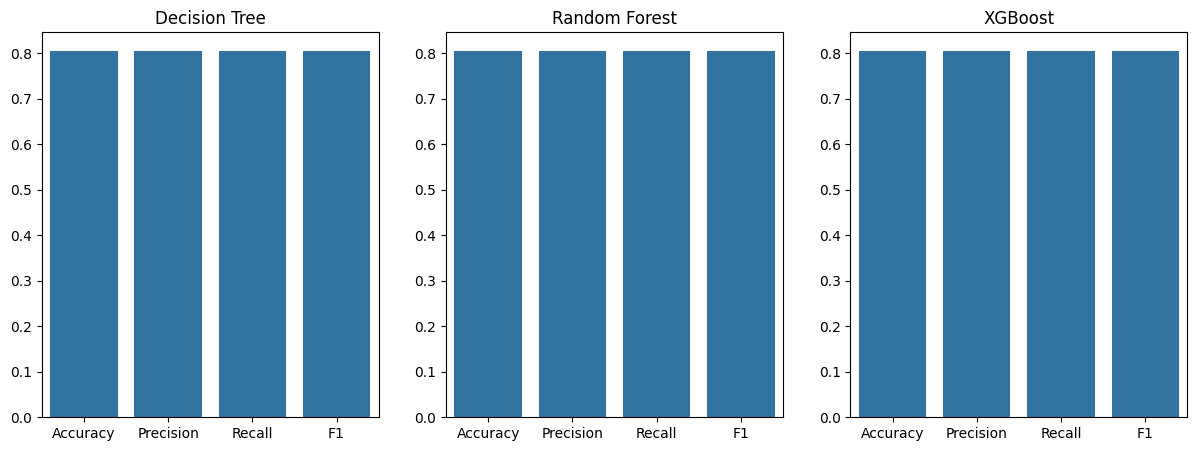

In [69]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()